<a href="https://colab.research.google.com/github/kritarth-mishra-1234/AI-and-ML-for-Water-Quality-Analysis-and-Prediction/blob/main/wqi_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pandas.core.indexes.base import F
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# reading data from csv file and mounting onto the drive
data = pd.read_csv('/content/wqi_new-3-i.csv')
from google.colab import drive
drive.mount('/content/drive')

#imputing missing values using linear regression
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imputed_data = imp.fit_transform(data)
data = pd.DataFrame(imputed_data, columns=data.columns)

#removes rows with any missing values
data.dropna(inplace=True)

# Splitting the data into training and testing sets as well as assigning data
train_data = data.sample(frac=0.8, random_state=1)
test_data = data.drop(train_data.index)

X_train = train_data[['temp', 'ph', 'bod', 'cod', 'tss', 'fc']]
y_train = train_data['WQI']

X_test = test_data[['temp', 'ph', 'bod', 'cod', 'tss', 'fc']]
y_test = test_data['WQI']

# Creating the instance of various classes and fitting the model into in
mse = []
r = []
for j in range(5):
   if j == 0 :
    r.append(LinearRegression().fit(X_train, y_train))
   elif j == 1:
    r.append(Lasso(alpha=0.1).fit(X_train, y_train))
   elif j == 2:
    r.append(Ridge(alpha=0.1).fit(X_train, y_train))
   elif j == 3:
    r.append(RandomForestRegressor(n_estimators=100, random_state=1).fit(X_train, y_train))
   elif j == 4:
    r.append(DecisionTreeRegressor(random_state=1).fit(X_train, y_train))
   # prediction and performance evaluation
   y_pred = r[j].predict(X_test)
   mse.append(mean_squared_error(y_test, y_pred))
   rmse = np.sqrt(mse[j])
   r2 = r2_score(y_test, y_pred)
   print(f"Model {j}")
   print(f"RMSE: {rmse:.2f}")
   print(f"R-squared: {r2:.2f}")


# #To create new prediction based data set for the initial data set
# X = data[['temp', 'ph', 'bod', 'cod', 'tss', 'fc']]
# data['wqi_predicted_lr'] = 0
# data['wqi_predicted_lasso'] = 0
# data['wqi_predicted_ridge'] = 0
# data['wqi_predicted_rf'] = 0
# data['wqi_predicted_dt'] = 0

# for i in range(len(X)):
#     temp = X['temp'][i]
#     ph = X['ph'][i]
#     bod = X['bod'][i]
#     cod = X['cod'][i]
#     tss = X['tss'][i]
#     fc = X['fc'][i]
#     new_data = pd.DataFrame({'temp': [temp], 'ph': [ph], 'bod': [bod], 'cod': [cod], 'tss': [tss], 'fc': [fc]})
#     for j in range(5):
#        pred = r[j].predict(new_data)[0]
#        col_name = f'{["wqi_predicted_lr", "wqi_predicted_lasso", "wqi_predicted_ridge", "wqi_predicted_rf", "wqi_predicted_dt"][j]}'
#        data.loc[i, col_name] = pred
#        print(f"The predicted WQI value for the input parameters is: {pred:.2f}")
# data.to_csv("capstone_output.csv")



#predictions based on user input

# parameter_1 = float(input("Enter value for parameter 1: "))
# parameter_2 = float(input("Enter value for parameter 2: "))
# parameter_3 = float(input("Enter value for parameter 3: "))
# parameter_4 = float(input("Enter value for parameter 4: "))
# parameter_5 = float(input("Enter value for parameter 5: "))
# parameter_6 = float(input("Enter value for parameter 6: "))
# new_data = pd.DataFrame({'temp': [parameter_1], 'ph': [parameter_2], 'bod': [parameter_3], 'cod': [parameter_4], 'tss': [parameter_5], 'fc': [parameter_6]})
# for j in range(5):
#    new_pred = r[j].predict(new_data)
#    print(new_pred)




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model 0
RMSE: 3.56
R-squared: 0.83
Model 1
RMSE: 3.60
R-squared: 0.83
Model 2
RMSE: 3.56
R-squared: 0.83
Model 3
RMSE: 3.52
R-squared: 0.84
Model 4
RMSE: 4.88
R-squared: 0.69


In [ ]:
from sklearn.metrics import mean_absolute_error, explained_variance_score

# Creating the instance of various classes and fitting the model into in
models = [
    LinearRegression(),
    Lasso(alpha=0.1),
    Ridge(alpha=0.1),
    RandomForestRegressor(n_estimators=100, random_state=1),
    DecisionTreeRegressor(random_state=1)
]

metrics = {
    'Model': [],
    'RMSE': [],
    'MAE': [],
    'R-squared': [],
    'Explained Variance': []
}

for j, model in enumerate(models):
    # Fitting the model
    model.fit(X_train, y_train)

    # Prediction and performance evaluation
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    evs = explained_variance_score(y_test, y_pred)

    metrics['Model'].append(f'Model {j}')
    metrics['RMSE'].append(rmse)
    metrics['MAE'].append(mae)
    metrics['R-squared'].append(r2)
    metrics['Explained Variance'].append(evs)

    print(f"Model {j}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"R-squared: {r2:.2f}")
    print(f"Explained Variance: {evs:.2f}")
    print("")

# Comparison summary
metrics_df = pd.DataFrame(metrics)
best_model_index = metrics_df['RMSE'].idxmin()
best_model = metrics_df.loc[best_model_index, 'Model']
print(f"Best Model: {best_model}")
print(metrics_df)


Model 0
RMSE: 3.56
MAE: 2.76
R-squared: 0.83
Explained Variance: 0.83

Model 1
RMSE: 3.60
MAE: 2.77
R-squared: 0.83
Explained Variance: 0.83

Model 2
RMSE: 3.56
MAE: 2.76
R-squared: 0.83
Explained Variance: 0.83

Model 3
RMSE: 3.52
MAE: 2.41
R-squared: 0.84
Explained Variance: 0.84

Model 4
RMSE: 4.88
MAE: 3.66
R-squared: 0.69
Explained Variance: 0.69

Best Model: Model 3
     Model      RMSE       MAE  R-squared  Explained Variance
0  Model 0  3.562101  2.757211   0.833395            0.834183
1  Model 1  3.595427  2.765197   0.830263            0.831230
2  Model 2  3.562553  2.757224   0.833353            0.834145
3  Model 3  3.518284  2.407079   0.837469            0.838024
4  Model 4  4.875841  3.655343   0.687842            0.691114


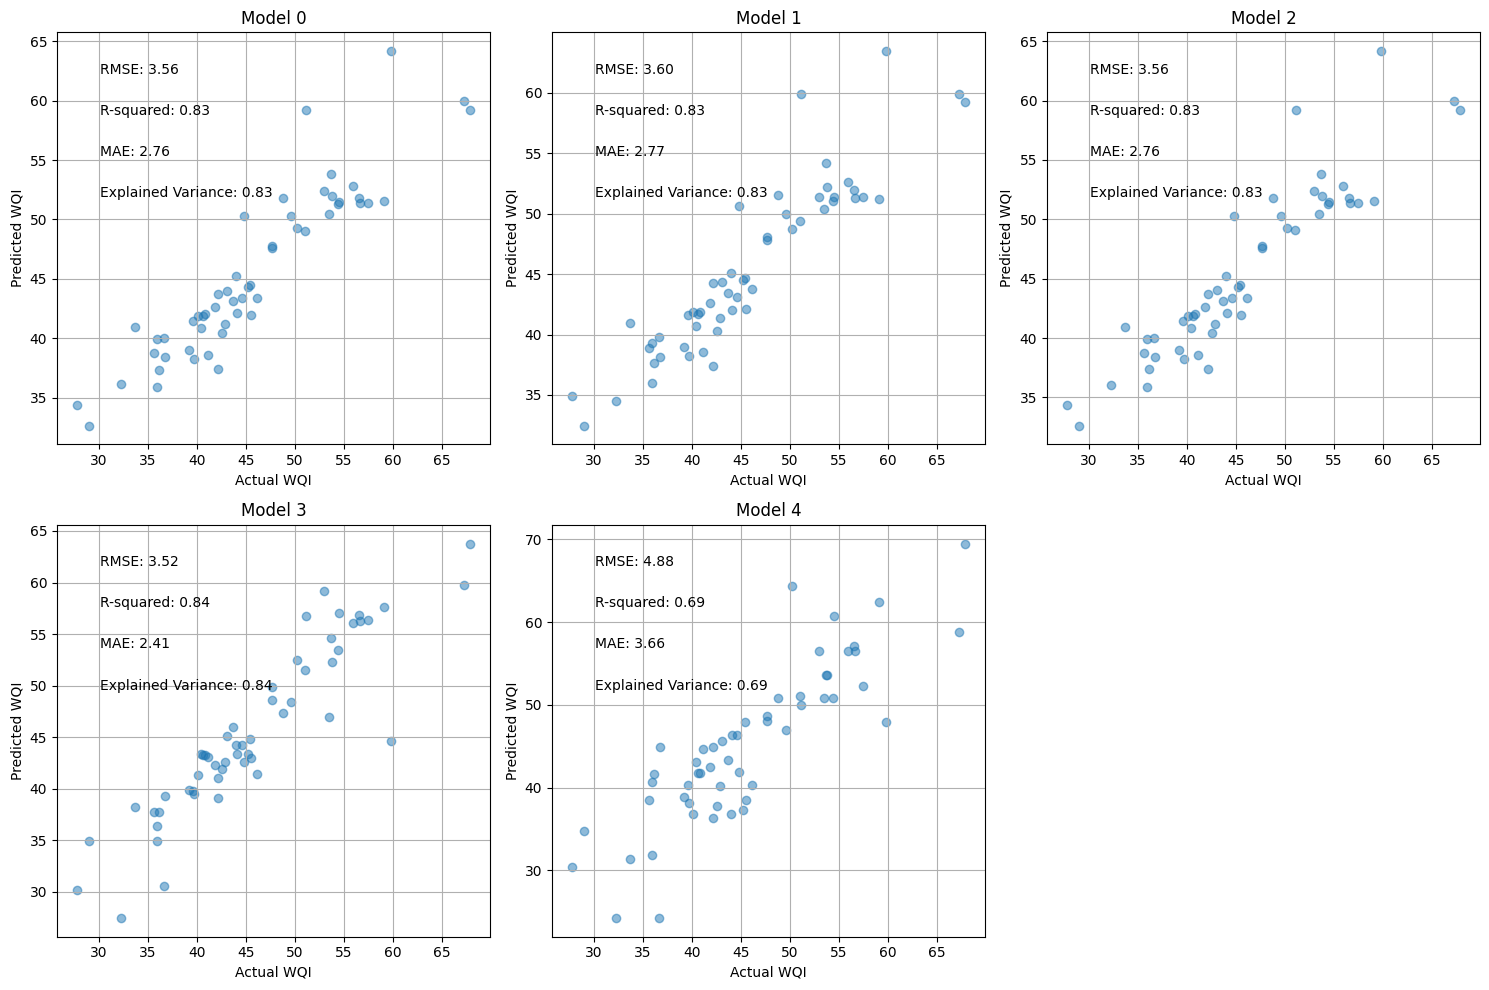

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# ... (your existing code)

# Creating the instance of various classes and fitting the model into in
models = [
    LinearRegression(),
    Lasso(alpha=0.1),
    Ridge(alpha=0.1),
    RandomForestRegressor(n_estimators=100, random_state=1),
    DecisionTreeRegressor(random_state=1)
]

# ... (your existing code)

# Visualization of Predictions vs Actual Values
plt.figure(figsize=(15, 10))
for j, model in enumerate(models):
    plt.subplot(2, 3, j + 1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.title(f'Model {j}')
    plt.xlabel('Actual WQI')
    plt.ylabel('Predicted WQI')
    plt.grid(True)

    # Inference
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    evs = explained_variance_score(y_test, y_pred)

    plt.text(0.1, 0.9, f"RMSE: {rmse:.2f}", transform=plt.gca().transAxes)
    plt.text(0.1, 0.8, f"R-squared: {r2:.2f}", transform=plt.gca().transAxes)
    plt.text(0.1, 0.7, f"MAE: {mae:.2f}", transform=plt.gca().transAxes)
    plt.text(0.1, 0.6, f"Explained Variance: {evs:.2f}", transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score, KFold

# Creating the instance of various classes and fitting the model into in
models = [
    LinearRegression(),
    Lasso(alpha=0.1),
    Ridge(alpha=0.1),
    RandomForestRegressor(n_estimators=100, random_state=1),
    DecisionTreeRegressor(random_state=1)
]

metrics = {
    'Model': [],
    'RMSE': [],
    'MAE': [],
    'R-squared': [],
    'Explained Variance': []
}

# Setting up cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=1)

for j, model in enumerate(models):
    # Fitting the model
    model.fit(X_train, y_train)

    # Cross-validation
    rmse_cv = np.sqrt(-cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=cv))
    mae_cv = -cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv)
    r2_cv = cross_val_score(model, X_train, y_train, scoring='r2', cv=cv)
    evs_cv = cross_val_score(model, X_train, y_train, scoring='explained_variance', cv=cv)

    metrics['Model'].append(f'Model {j}')
    metrics['RMSE'].append(rmse_cv.mean())
    metrics['MAE'].append(mae_cv.mean())
    metrics['R-squared'].append(r2_cv.mean())
    metrics['Explained Variance'].append(evs_cv.mean())

    print(f"Model {j}")
    print(f"Cross-Validation RMSE: Mean = {rmse_cv.mean():.2f}, Std = {rmse_cv.std():.2f}")
    print(f"Cross-Validation MAE: Mean = {mae_cv.mean():.2f}, Std = {mae_cv.std():.2f}")
    print(f"Cross-Validation R-squared: Mean = {r2_cv.mean():.2f}, Std = {r2_cv.std():.2f}")
    print(f"Cross-Validation Explained Variance: Mean = {evs_cv.mean():.2f}, Std = {evs_cv.std():.2f}")
    print("")

# Comparison summary
metrics_df = pd.DataFrame(metrics)
best_model_index = metrics_df['RMSE'].idxmin()
best_model = metrics_df.loc[best_model_index, 'Model']
print(f"Best Model: {best_model}")
print(metrics_df)


Model 0
Cross-Validation RMSE: Mean = 5.53, Std = 1.31
Cross-Validation MAE: Mean = 3.43, Std = 0.43
Cross-Validation R-squared: Mean = 0.61, Std = 0.19
Cross-Validation Explained Variance: Mean = 0.63, Std = 0.18

Model 1
Cross-Validation RMSE: Mean = 5.36, Std = 1.21
Cross-Validation MAE: Mean = 3.41, Std = 0.43
Cross-Validation R-squared: Mean = 0.64, Std = 0.17
Cross-Validation Explained Variance: Mean = 0.65, Std = 0.17

Model 2
Cross-Validation RMSE: Mean = 5.53, Std = 1.31
Cross-Validation MAE: Mean = 3.43, Std = 0.43
Cross-Validation R-squared: Mean = 0.62, Std = 0.18
Cross-Validation Explained Variance: Mean = 0.63, Std = 0.18

Model 3
Cross-Validation RMSE: Mean = 4.19, Std = 0.82
Cross-Validation MAE: Mean = 2.91, Std = 0.50
Cross-Validation R-squared: Mean = 0.79, Std = 0.06
Cross-Validation Explained Variance: Mean = 0.79, Std = 0.06

Model 4
Cross-Validation RMSE: Mean = 5.53, Std = 0.80
Cross-Validation MAE: Mean = 4.06, Std = 0.45
Cross-Validation R-squared: Mean = 0.63